# TPs: Métaheuristiques
## Les Imports :

In [657]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from typing import Union, List, Tuple

def readFile(filename: str) -> np.array:
    size: int = 6
    with open(filename, 'r') as f:
        data = [int(x) for x in f.read().split()]
        size = int(data[0])
        p = int(data[1])
        data = data[2:]
        matrix = [data[i:i + size] for i in range(0, len(data), size)]
        return np.array(matrix), p


## Exercice 1 ("Unconstrained Binary Quadratic Problem").
Un UBQP (Unconstrained Binary Quadratic Problem) a pour but de minimiser le résultat d’une fonction f pouvant s’écrire sous la forme :
$$
    f(x) = \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i x_j
$$
où Q est une matrice symétrique n × n de constantes et X est un n-uplet de variables binaires. On peut par exemple considérer la matrice Q suivante :

$$
    Q = \begin{pmatrix}
        -17 & 10 & 10 & 10 & 0 & 20 \\
        10 & -18 & 10 & 10 & 10 & 20 \\
        10 & 10 & -29 & 10 & 20 & 20 \\
        10 & 10 & 10 & -19 & 10 & 10 \\
        0 & 10 & 20 & 10 & -17 & 10 \\
        20 & 20 & 20 & 10 & 10 & -28
    \end{pmatrix}
$$

### Question 1.1 :
Écrire une fonction qui renvoie une solution initiale au hasard pour ce problème, c’est-à-dire qui renvoie un vecteur de n bits tirés aléatoirement (la taille du vecteur sera paramètrable selon la valeur lue dans le fichier utilisé en entrée).


In [658]:
random.seed(10)
def new_random_x(size: int) -> list:
    x = []
    for _ in range(size):
        x.append(random.randint(0, 1))
    return x

### Question 1.2 :
Écrire une fonction qui calcule la valeur de cette solution par f dont Q est décrit dans le fichier en entrée.

In [659]:
def ubqp(q: np.array, x: list) -> int:
    return sum(
        q[i][j] * x[i] * x[j] for i in range(len(x)) for j in range(len(x))
    )


### Question 1.3 :
Programmer une fonction meilleur_voisin qui renvoie la meilleure solution voisine de X où un voisin X' de X est une séquence de bits qui ne différe de X que par un seul bit.

In [660]:
def best_neighbor(q: np.array, x: list) -> list:
    best = [x]
    best_score = ubqp(q, x)
    for i in range(len(x)):
        x_prime = x.copy()
        x_prime[i] = 1 - x_prime[i]
        score = ubqp(q, x_prime)
        if score < best_score:
            best = [x_prime]
            best_score = score
        elif score == best_score:
            best.append(x_prime)
    return best[np.random.randint(0, len(best))]


### Question 1.4 :
Programmer la méthode du Steepest Hill-Climbing. Nous choisissons, ici, la version du Steepest Hill-Climbing dans laquelle “meilleur” signifie “strictement meilleur”.

In [661]:


def steepest_hill_climbing(q: np.array, x: list, max_depl: int) -> Tuple[list, int]:
    s_best = x
    s_score_best = ubqp(q, s_best)
    nb_depl = 0
    stop = False
    while nb_depl < max_depl and not stop:
        s_prime = best_neighbor(q, s_best)
        s_prime_score = ubqp(q, s_prime)
        if s_prime_score < s_score_best:
            s_best = s_prime
            s_score_best = s_prime_score
        else:
            stop = True
        nb_depl += 1
    return s_prime, s_prime_score

### Question 1.5 :
Programmer une variante avec redémarrages, c’est-à-dire faire une boucle externe autour du Steepest Hill-Climbing permettant de partir d’une nouvelle solution tirée au hasard, puis d’effectuer un essai : c’est-à-dire faire au plus MAX_depl déplacements vers des meilleurs voisins (un essai peut s’arrêter avant d’avoir fait les MAX_depl déplacements vers des meilleurs voisins, puis redémarrer avec une nouvelle solution au hasard. Cette boucle externe devra être faite MAX_essais fois.

In [662]:
def random_restart_hill_climbing(q: np.array, x: list, max_depl: int, max_restart: int) -> Tuple[list, int]:
    s_best = x
    s_score_best = ubqp(q, s_best)
    nb_restart = 0
    while nb_restart < max_restart:
        s_prime, s_prime_score = steepest_hill_climbing(
            q, new_random_x(len(q)), max_depl)
        if s_prime_score < s_score_best:
            s_best = s_prime
            s_score_best = s_prime_score
        nb_restart += 1
    return s_best, s_score_best

### Question 1.6 :
Faîtes tourner vos programmes sur les deux fichiers partition6.txt et graphe12345.txt

In [663]:

print('Execution des différents algorithmes sur le fichier partition6 :')
Qpartition6, Ppartition6 = readFile('files/partition6.txt')

X = new_random_x(len(Qpartition6))

print(best_neighbor(Qpartition6, X))
print(steepest_hill_climbing(Qpartition6, X, 100))
print(random_restart_hill_climbing(Qpartition6, X, 100, 100))

print('')
print('Execution des différents algorithmes sur le fichier graphe12345 :')
Qgraphe12345, Pgraphe12345 = readFile('files/graphe12345.txt')

X = new_random_x(len(Qgraphe12345))

print(best_neighbor(Qgraphe12345, X))
print(steepest_hill_climbing(Qgraphe12345, X, 100))
print(random_restart_hill_climbing(Qgraphe12345, X, 100, 100))


Execution des différents algorithmes sur le fichier partition6 :
[0, 1, 1, 0, 0, 0]
([0, 0, 1, 0, 0, 0], -29)
([1, 0, 0, 0, 1, 0], -34)

Execution des différents algorithmes sur le fichier graphe12345 :
[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], -20)
([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], -20)


### Question 1.7 :
Programmer la méthode tabou en essayant différentes tailles pour la liste Tabou.

In [664]:
def tabu_search(q: np.array, x: list, max_depl: int, max_tabu: int) -> list:
    s = x
    tabu = []
    nb_depl = 0
    msol = s
    stop = False
    while nb_depl < max_depl and not stop:
        if len(tabu) > max_tabu:
            tabu.pop(0)
        neighbors = [s_prime for s_prime in [
            best_neighbor(q, s)] if s_prime not in tabu]
        if len(neighbors) > 0:
            s_prime = neighbors[0]
            tabu.append(s)
            if ubqp(q, s_prime) < ubqp(q, msol):
                msol = s_prime
            s = s_prime
        else:
            stop = True
        nb_depl += 1
    return msol, ubqp(q, msol)

In [665]:
print('Execution de l\'algorithme tabu search sur le fichier partition6 :')
X = new_random_x(len(Qpartition6))
print('List tabou taille 1 :')
print(tabu_search(Qpartition6, X, 100, 1))
print('List tabou taille 10 :')
print(tabu_search(Qpartition6, X, 100, 10))
print('List tabou taille 100 :')
print(tabu_search(Qpartition6, X, 100, 100))
print('List tabou taille 1000 :')
print(tabu_search(Qpartition6, X, 100, 1000))
print('List tabou taille 10000 :')
print(tabu_search(Qpartition6, X, 100, 10000))

print('')
print('Execution de l\'algorithme tabu search sur le fichier graphe12345 :')
X = new_random_x(len(Qgraphe12345))
print('List tabou taille 1 :')
print(tabu_search(Qgraphe12345, X, 100, 1))
print('List tabou taille 10 :')
print(tabu_search(Qgraphe12345, X, 100, 10))
print('List tabou taille 100 :')
print(tabu_search(Qgraphe12345, X, 100, 100))
print('List tabou taille 1000 :')
print(tabu_search(Qgraphe12345, X, 100, 1000))
print('List tabou taille 10000 :')
print(tabu_search(Qgraphe12345, X, 100, 10000))


Execution de l'algorithme tabu search sur le fichier partition6 :
List tabou taille 1 :
([1, 0, 0, 0, 1, 0], -34)
List tabou taille 10 :
([1, 0, 0, 0, 1, 0], -34)
List tabou taille 100 :
([1, 0, 0, 0, 1, 0], -34)
List tabou taille 1000 :
([1, 0, 0, 0, 1, 0], -34)
List tabou taille 10000 :
([1, 0, 0, 0, 1, 0], -34)

Execution de l'algorithme tabu search sur le fichier graphe12345 :
List tabou taille 1 :
([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], -20)
List tabou taille 10 :
([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], -16)
List tabou taille 100 :
([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], -20)
List tabou taille 1000 :
([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], -16)
List tabou taille 10000 :
([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], -20)


### Question 1.8 :
On impose maintenant une contraintes sur les solutions, on cherche une séquence binaire dont la somme des bits est supérieure ou égale à p. Modifiez votre fonction meilleur_voisin afin qu’elle prenne en compte cette contrainte où p est le deuxième nombre donné dans le fichier décrivant le problème(pour partition6.txt ce nombre est 2, pour graphe12345.txt c’est 4). Testez le Steepest-Hill-Climbing avec redémarrage sous cette contrainte.


In [666]:
def best_neighbor_bis(q: np.array, x: list, p: int) -> list:
    best = [x]
    best_score = ubqp(q, x)
    for i in range(len(x)):
        x_prime = x.copy()
        x_prime[i] = 1 - x_prime[i]
        if sum(x_prime) < p:  # vérifie si la contrainte est respectée
            continue
        score = ubqp(q, x_prime)
        if score < best_score:
            best = [x_prime]
            best_score = score
        elif score == best_score:
            best.append(x_prime)
    return best[np.random.randint(0, len(best))]


def steepest_hill_climbing_bis(q: np.array, x: list, p: int, max_depl: int) -> Tuple[list, int]:
    s_best = x
    s_score_best = ubqp(q, s_best)
    nb_depl = 0
    stop = False
    while nb_depl < max_depl and not stop:
        s_prime = best_neighbor_bis(q, s_best, p)
        s_prime_score = ubqp(q, s_prime)
        if s_prime_score < s_score_best:
            s_best = s_prime
            s_score_best = s_prime_score
        else:
            stop = True
        nb_depl += 1
    return s_prime, s_prime_score


def random_restart_hill_climbing_bis(q: np.array, x: list, p: int, max_depl: int, max_restart: int) -> Tuple[list, int]:
    s_best = x
    s_score_best = ubqp(q, s_best)
    nb_restart = 0
    while nb_restart < max_restart:
        s_prime, s_prime_score = steepest_hill_climbing_bis(
            q, new_random_x(len(q)), p, max_depl)
        if s_prime_score < s_score_best:
            s_best = s_prime
            s_score_best = s_prime_score
        nb_restart += 1
    return s_best, s_score_best



print('Execution de l\'algorithme random restart hill climbing sur le fichier partition6 :')
X = new_random_x(len(Qpartition6))
print(random_restart_hill_climbing_bis(Qpartition6, X, Ppartition6, 100, 100))

print('')
print('Execution de l\'algorithme random restart hill climbing sur le fichier graphe12345 :')
X = new_random_x(len(Qgraphe12345))
print(random_restart_hill_climbing_bis(
    Qgraphe12345, X, Pgraphe12345, 100, 100))


Execution de l'algorithme random restart hill climbing sur le fichier partition6 :
([1, 0, 0, 0, 1, 0], -34)

Execution de l'algorithme random restart hill climbing sur le fichier graphe12345 :
([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], -20)


## Exercice 2 (Voyageur de commerce).
Le célèbre problème du Voyageur de commerce (Travelling Salesman Problem TSP) consiste à trouver une tournée passant par toutes les villes ayant la plus courte distance totale. On dispose pour cela d’un fichier dans lequel on dispose d’une liste de n villes (le nombre n est donné au début du fichier) avec des identifiants et des coordonnées sous la forme : \
Id, x, y où Id est un numéro de ville, et (x,y) sont ses coordonnées, les villes sont toujours données dans l’ordre des Identifiants de 1 à n (Id est donc inutile et peut-être retrouvé avec le numéro de la ligne lue).

Une solution de ce problème est une séquence de n villes, elle représente une tournée partant du point (0,0) puis passant par chacune des villes de la séquence puis revenant au point (0,0). Pour spimplifier, on assimilera la distance entre deux villes à leur distance euclidienne :

$
    d(x,y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$

Par exemple, en utilisant le fichier tsp5.txt décrivant les coordonnées de 5 villes, la solution $ [5, 3, 4, 1, 2] $ correspond à une tournée de longueur 263.88 km.

Le problème consiste à trouver une tournée de longueur minimale.

In [667]:
def read_city_file(nom_fichier: str) -> Tuple[int, List[Tuple[int, float, float]]]:
    with open(nom_fichier, "r") as f:
        n = int(f.readline())
        villes = []
        for ligne in f:
            id_ville, x, y = ligne.split()
            villes.append((int(id_ville), float(x), float(y)))
    return n, villes


def afficher_solution(solution: List[int], villes: List[Tuple[int, float, float]]):
    villes = [next(v for v in villes if v[0] == id_ville)
              for id_ville in solution]
    x, y = [v[1] for v in villes], [v[2] for v in villes]
    x.insert(0, 0)
    x.append(0)
    y.insert(0, 0)
    y.append(0)
    plt.plot(x, y, "ro")
    plt.plot(x, y, "k--", alpha=0.3)
    plt.title("Affichage de la solution")
    plt.xlabel("Coordonnée x")
    plt.ylabel("Coordonnée y")
    for i, ville in enumerate(villes):
        plt.text(ville[1], ville[2], f"{ville[0]}")
    plt.show()


tsp5 = read_city_file("files/tsp5.txt")
tsp101 = read_city_file("files/tsp101.txt")


### Question 2.1 :
Écrire une fonction qui renvoie une solution initiale au hasard pour ce problème, c’est-à-dire qui renvoie un vecteur de n villes tirées aléatoirement (la taille du vecteur sera paramètrable selon la valeur lue dans le fichier utilisé en entrée). \
Pour cette fonction vous pouvez soit utiliser une méthode constructive (créer une liste chaînée des villes et tirer aléatoirement l’indice de la première ville de 1 à n, supprimer la ville correspondante de la liste puis tirer aléatoirement entre 1 et n − 1 la deuxième ville etc) ou une méthode itérative (partir de la solution X où les villes sont dans l’ordre croissant de 1 à n et pour i = 1 à n échanger X[i] et X[random(n)]).

In [668]:

def solution_initiale_au_hasard(n: int) -> List[int]:
    villes = list(range(1, n+1))
    solution = []
    for i in range(n):
        indice_ville = random.randint(0, len(villes)-1)
        solution.append(villes.pop(indice_ville))
    return solution

### Question 2.2 :
Écrire une fonction qui calcule la valeur de cette solution c’est-à-dire la distance que le voyageur de commerce doit parcourir en partant de (0,0) puis en passant par toutes les villes $ X[1] ... X[n] $ et en revenant en (0,0).

In [669]:
def calculer_valeur_solution(solution: List[int], villes: List[Tuple[int, float, float]]) -> float:
    distance_totale = 0
    distance_totale += math.sqrt((villes[solution[0]-1][1])
                                 ** 2 + (villes[solution[0]-1][2])**2)
    for i in range(len(solution)-1):
        ville1 = villes[solution[i]-1]
        ville2 = villes[solution[i+1]-1]
        distance_totale += math.sqrt((ville1[1] - ville2[1])
                                     ** 2 + (ville1[2] - ville2[2])**2)
    distance_totale += math.sqrt((villes[solution[-1]-1][1])
                                 ** 2 + (villes[solution[-1]-1][2])**2)
    return distance_totale



print(' Valeur pour la solution [5, 3, 4, 1, 2] :')
print(calculer_valeur_solution( [5, 3, 4, 1, 2], tsp5[1]), 'km')

 Valeur pour la solution [5, 3, 4, 1, 2] :
263.88370589046286 km


### Question 2.3 :
Programmer une fonction meilleur_voisin qui renvoie la meilleure solution voisine de X où un voisin X' de X est la séquence obtenue en permutant deux villes dans la séquence X.

In [670]:
def meilleur_voisin(solution: List[int], villes: List[Tuple[int, float, float]]) -> List[int]:
    meilleure_solution = solution[:]
    distance_minimale = calculer_valeur_solution(solution, villes)
    for i in range(len(solution)):
        for j in range(i+1, len(solution)):
            solution[i], solution[j] = solution[j], solution[i]
            distance_solution = calculer_valeur_solution(solution, villes)
            if distance_solution < distance_minimale:
                meilleure_solution = solution[:]
                distance_minimale = distance_solution
            solution[i], solution[j] = solution[j], solution[i]
    return meilleure_solution

### Question 2.4 :
Utilisez la méthode du Steepest Hill-Climbing sur les fichiers tsp5.txt et tsp101.txt et les méthodes avec redémarrages en redémarrant MAX_essais fois. Pour chaque essai, vous devrez être capable d’afficher la solution initiale tirée au hasard, la solution atteinte et le nombre de déplacements effectués depuis la solution initiale jusqu’à la solution atteinte.

In [671]:
def city_steepest_hill_climbing(villes: List[Tuple[int, float, float]], x: List[int], max_depl: int) -> Union[List[int], int]:
    s_courant = x[:]
    distance_minimale = calculer_valeur_solution(s_courant, villes)
    nb_depl = 0
    stop = False
    while nb_depl < max_depl and not stop:
        s_voisin = meilleur_voisin(s_courant, villes)
        distance_voisin = calculer_valeur_solution(s_voisin, villes)
        if distance_voisin < distance_minimale:
            s_courant = s_voisin[:]
            distance_minimale = distance_voisin
        else:
            stop = True
        nb_depl += 1
    return s_courant, distance_minimale


def random_restart_city_hill_climbing(villes: List[Tuple[int, float, float]], x: List[int], max_depl: int, max_restart: int) -> Union[List[int], int]:
    s_best = x[:]
    distance_minimale = calculer_valeur_solution(s_best, villes)
    nb_restart = 0
    while nb_restart < max_restart:
        s_prime, distance_prime = city_steepest_hill_climbing(
            villes, solution_initiale_au_hasard(len(villes)), max_depl)
        if distance_prime < distance_minimale:
            s_best = s_prime[:]
            distance_minimale = distance_prime
        nb_restart += 1
    return s_best, distance_minimale


Résultat de la méthode steepest hill climbing sur le fichier tsp5 :
[3, 5, 4, 2, 1] 194.04052963659356 km


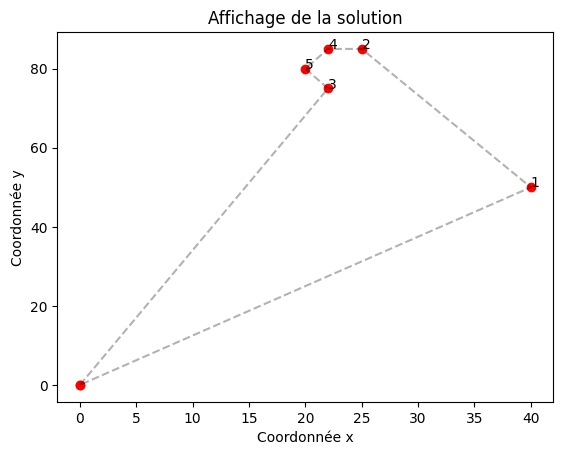

In [672]:
print('Résultat de la méthode steepest hill climbing sur le fichier tsp5 :')
solution, distance = random_restart_city_hill_climbing(tsp5[1],
                                                 solution_initiale_au_hasard(5), 100, 100)
print(solution, distance, 'km')
afficher_solution(solution, tsp5[1])

Résultat de la méthode steepest hill climbing sur le fichier tsp101 :
[76, 59, 78, 26, 19, 49, 22, 24, 60, 88, 14, 16, 17, 18, 48, 74, 79, 61, 97, 55, 73, 40, 41, 44, 45, 43, 82, 91, 1, 42, 39, 38, 36, 37, 72, 94, 95, 92, 57, 67, 66, 99, 83, 100, 53, 84, 65, 96, 85, 50, 20, 52, 68, 93, 81, 56, 89, 54, 13, 15, 12, 11, 10, 58, 63, 51, 35, 32, 30, 28, 27, 29, 31, 33, 34, 90, 77, 64, 86, 21, 23, 25, 75, 87, 80, 8, 7, 9, 47, 5, 46, 6, 4, 2, 3, 101, 71, 62, 69, 70, 98] 1033.7082995984579 km


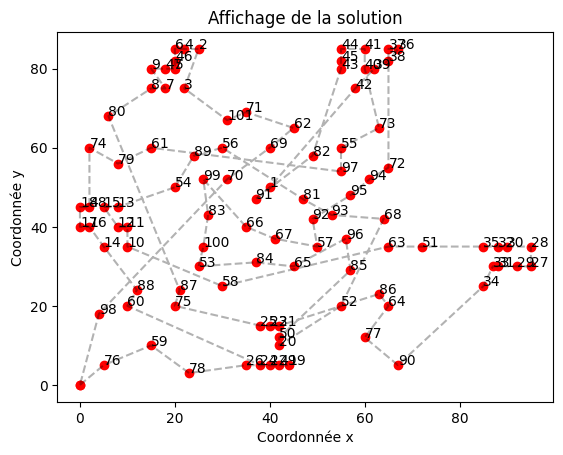

In [673]:
print('Résultat de la méthode steepest hill climbing sur le fichier tsp101 :')
solution, distance = random_restart_city_hill_climbing(tsp101[1],
                                                 solution_initiale_au_hasard(101), 100, 100)

print(solution, distance, 'km')
afficher_solution(solution, tsp101[1])

### Question 2.5 :
Utilisez la méthode tabou en essayant différentes tailles pour la liste tabou et pour MAX_depl. De la même manière, vous devrez pouvoir afficher la solution initiale, la solution atteinte, le nombre de déplacements effectués jusqu’à la solution atteinte, la meilleure solution rencontrée, le contenu de la liste tabou à la fin de la recherche.

In [674]:
def tabou_search(villes: List[Tuple[int, float, float]], x: List[int], max_depl: int, tabou_size: int) -> Union[List[int], int]:
    s_courant = x[:]
    distance_minimale = calculer_valeur_solution(s_courant, villes)
    tabou = []
    nb_depl = 0
    stop = False
    while nb_depl < max_depl and not stop:
        meilleurs_voisins = []
        distance_minimale_voisins = float("inf")
        for i in range(len(s_courant)):
            for j in range(i+1, len(s_courant)):
                s_voisin = s_courant[:]
                s_voisin[i], s_voisin[j] = s_voisin[j], s_voisin[i]
                distance_voisin = calculer_valeur_solution(s_voisin, villes)
                if distance_voisin < distance_minimale_voisins and s_voisin not in tabou:
                    meilleurs_voisins = [s_voisin]
                    distance_minimale_voisins = distance_voisin
                elif distance_voisin == distance_minimale_voisins and s_voisin not in tabou:
                    meilleurs_voisins.append(s_voisin)
        if meilleurs_voisins:
            s_courant = meilleurs_voisins[np.random.randint(
                0, len(meilleurs_voisins))]
            distance_minimale = distance_minimale_voisins
            tabou.append(s_courant)
            if len(tabou) > tabou_size:
                tabou.pop(0)
        else:
            stop = True
        nb_depl += 1
    return s_courant, distance_minimale

In [683]:
print("Solution tsp5 :")
for tabou_size in [5, 10, 20, 50, 100]:
    print(f"    Avec une liste tabou de taille {tabou_size} :")
    for max_depl in [1, 10, 100, 1000, 10000, 100000]:
        solution, distance = tabou_search(
            tsp5[1], solution_initiale_au_hasard(5), max_depl, tabou_size)
        print(
            f"      Avec un nombre maximal de déplacements {max_depl}: ")
        print(f"        {solution}(distance={distance: .2f})")


Solution tsp5 :
    Avec une liste tabou de taille 5 :
      Avec un nombre maximal de déplacements 1: 
        [5, 4, 2, 3, 1](distance= 196.12)
      Avec un nombre maximal de déplacements 10: 
        [1, 3, 5, 2, 4](distance= 198.09)
      Avec un nombre maximal de déplacements 100: 
        [1, 4, 2, 5, 3](distance= 197.00)
      Avec un nombre maximal de déplacements 1000: 
        [1, 5, 4, 2, 3](distance= 197.07)
      Avec un nombre maximal de déplacements 10000: 
        [3, 2, 4, 5, 1](distance= 197.07)
      Avec un nombre maximal de déplacements 100000: 
        [1, 3, 4, 2, 5](distance= 197.37)
    Avec une liste tabou de taille 10 :
      Avec un nombre maximal de déplacements 1: 
        [3, 5, 4, 2, 1](distance= 194.04)
      Avec un nombre maximal de déplacements 10: 
        [2, 4, 5, 3, 1](distance= 197.21)
      Avec un nombre maximal de déplacements 100: 
        [1, 4, 2, 5, 3](distance= 197.00)
      Avec un nombre maximal de déplacements 1000: 
        [1, 3, 4

In [682]:
print("Solution tsp101 :")
for tabou_size in [5, 10, 20, 50, 100]:
    print(f"    Avec une liste tabou de taille {tabou_size} :")
    for max_depl in [1, 10, 100]:
        solution, distance = tabou_search(
            tsp101[1], solution_initiale_au_hasard(101), max_depl, tabou_size)
        print(
            f"      Avec un nombre maximal de déplacements {max_depl}: ")
        print(f"        {solution}(distance={distance: .2f})")


Solution tsp101 :
    Avec une liste tabou de taille 5 :
      Avec un nombre maximal de déplacements 1: 
        [32, 92, 67, 29, 100, 101, 59, 26, 1, 2, 5, 11, 76, 87, 94, 12, 42, 63, 43, 77, 25, 35, 37, 49, 19, 54, 70, 6, 85, 45, 3, 73, 46, 16, 28, 22, 14, 18, 47, 7, 13, 99, 4, 84, 52, 8, 10, 17, 41, 55, 80, 36, 60, 57, 61, 40, 96, 97, 88, 78, 91, 75, 23, 34, 69, 66, 48, 24, 79, 64, 21, 58, 71, 68, 90, 72, 9, 39, 44, 95, 81, 83, 33, 30, 38, 62, 74, 65, 56, 27, 86, 31, 53, 98, 89, 15, 93, 20, 51, 50, 82](distance= 4260.20)
      Avec un nombre maximal de déplacements 10: 
        [66, 83, 89, 81, 90, 22, 61, 57, 52, 63, 84, 58, 98, 25, 86, 33, 34, 35, 29, 65, 1, 13, 12, 72, 55, 41, 3, 18, 82, 39, 101, 7, 67, 50, 20, 59, 49, 19, 75, 53, 56, 62, 8, 100, 92, 68, 26, 24, 21, 76, 74, 44, 42, 40, 73, 94, 5, 80, 99, 37, 46, 88, 78, 36, 31, 96, 43, 97, 28, 95, 38, 45, 54, 16, 48, 69, 47, 9, 2, 4, 10, 87, 77, 85, 64, 32, 91, 71, 6, 14, 60, 51, 93, 17, 11, 79, 70, 15, 23, 27, 30](distance= 303